In [12]:
import os
import argparse
import numpy as np
import pandas as pd
import h5py
import SimpleITK as sitk
import nibabel as nib
from tqdm.auto import tqdm, trange

In [13]:
img = sitk.ReadImage('F:\\v3r\study\\AI\\reg2d3d\\trandicom\\022')
print(img.GetSize())
data = sitk.GetArrayFromImage(img)

print(type(data),data.shape)

(978, 1067, 1)
<class 'numpy.ndarray'> (1, 1067, 978)


<function matplotlib.pyplot.show(close=None, block=None)>

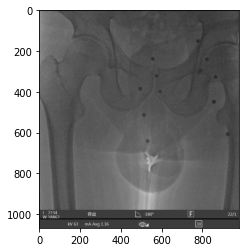

In [14]:
import matplotlib.pyplot as plt

plt.imshow(data.squeeze(),cmap='gray')
plt.show


In [15]:
def write_image_to_h5(img_file,case_id,h5_filename):
    #os.makedirs(h5_filename, exist_ok=True)
    f = h5py.File(h5_filename,'a')

    img = sitk.ReadImage(img_file)
    print(img.GetSize())
    data = sitk.GetArrayFromImage(img).squeeze()
    orig_img_shape = data.shape
    # pId_g = f['{:2d}'.format(case_id)]
    # if pId_g is None:
    pId_g =  f.create_group('{:02d}'.format(case_id))
    projs_idst = pId_g.create_dataset('projs',(1,*orig_img_shape),dtype='f4')
    projs_idst[0,] = data


    #write landmark name
    landmark_names = [ 
        'FH-l', 
        'FH-r',
        'GSN-l',
        'GSN-r',
        'IOF-l',
        'IOF-r',
        'MOF-l',
        'MOF-r',  
        'SPS-l',
        'SPS-r',
        'IPS-l',
        'IPS-r',
        'ASIS-l',
        'ASIS-r',
    ]
    # land_names_g = f['land-names']
    # if land_names_g is None:
    land_names_g = f.create_group('land-names')
    
    num_lands = len(landmark_names)
    land_names_g['num-lands'] = num_lands

    for i in range(num_lands):
        land_names_g["land-{:02d}".format(i)] = landmark_names[i]
    f.close()


In [16]:
write_image_to_h5("F:\\v3r\study\\AI\\reg2d3d\\trandicom\\022",1,'my_x8_ds3.h5')

(978, 1067, 1)
